# Weighted regression of global temperature data

The goal is to come up with a predictive model for temperatures based on data from 
https://datahub.io/core/global-temp



In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd


### Download the data

In [2]:
data = pd.read_csv("Temperature.csv")
data.head(3)


,Unnamed: 0,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,...,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,var
0,0,1880,-0.17,-0.23,-0.08,-0.15,-0.08,-0.20,-0.17,-0.09,...,-0.22,-0.21,-0.17,-0.16,***,***,-0.10,-0.15,-0.19,5.0
1,1,1881,-0.19,-0.13,0.04,0.06,0.07,-0.17,0.02,-0.02,...,-0.2,-0.17,-0.05,-0.07,-0.08,-0.16,0.06,-0.06,-0.17,5.0
2,2,1882,0.18,0.15,0.06,-0.15,-0.13,-0.22,-0.15,-0.06,...,-0.23,-0.15,-0.35,-0.1,-0.07,0.09,-0.08,-0.14,-0.17,5.0


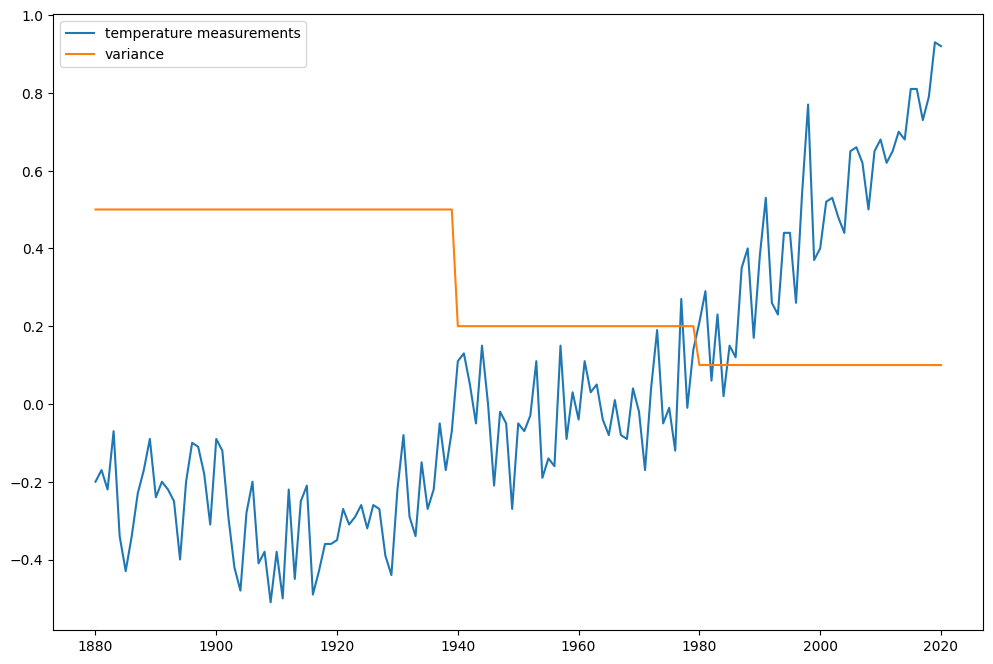

In [3]:
names = data.columns
t = data['Year']
y = data['Jun']
var = (data['var'])
fig = plt.figure(figsize=[12,8])
s=plt.plot(t,y,label='temperature measurements')
s=plt.plot(t,0.1*var,label='variance')
s = plt.legend()


# Part A

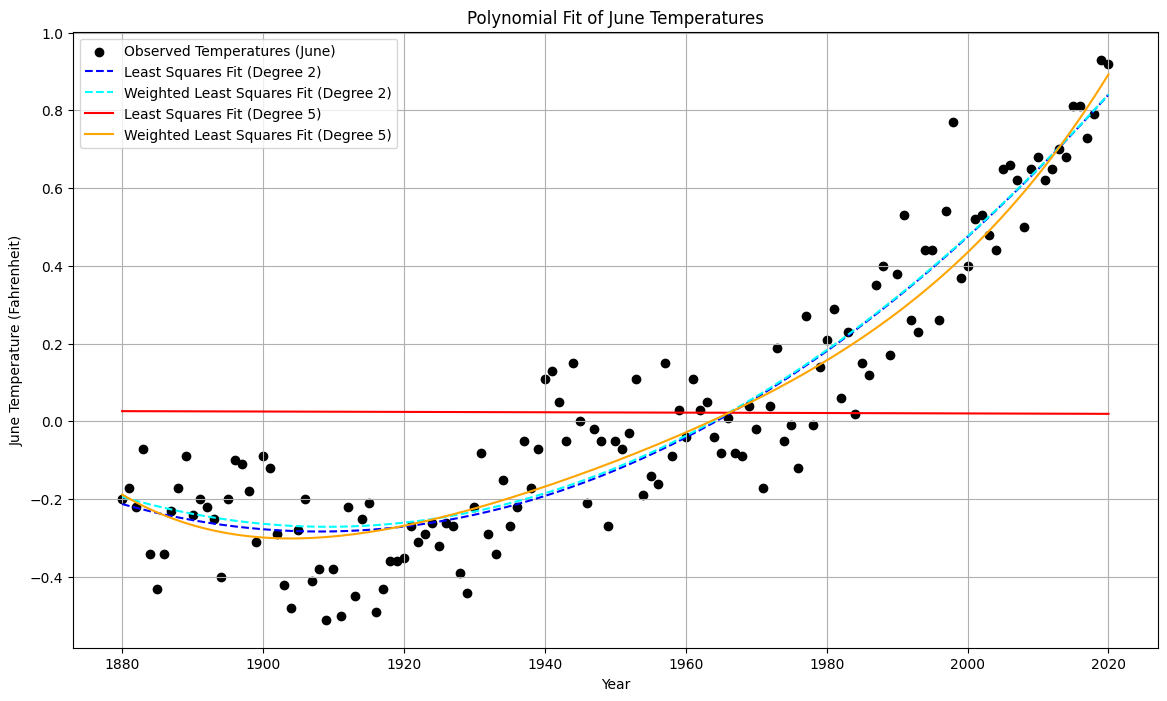

In [4]:
t = data['Year']
y = data['Jun']
var = data['var']

t = np.array(t)
y = np.array(y)
var = np.array(var)

weights = 1 / var

def create_design_matrix(t, degree):
    return np.vstack([t**i for i in range(degree + 1)]).T

def least_square_fit(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

def weighted_least_square_fit(X, y, weights):
    W = np.diag(weights)
    return np.linalg.inv(X.T @ W @ X) @ X.T @ W @ y

degree_2 = 2
X2 = create_design_matrix(t, degree_2)
theta_LS_2 = least_square_fit(X2, y)
theta_WLS_2 = weighted_least_square_fit(X2, y, weights)
y_pred_LS_2 = X2 @ theta_LS_2
y_pred_WLS_2 = X2 @ theta_WLS_2

degree_5 = 5
X5 = create_design_matrix(t, degree_5)
theta_LS_5 = least_square_fit(X5, y)
theta_WLS_5 = weighted_least_square_fit(X5, y, weights)
y_pred_LS_5 = X5 @ theta_LS_5
y_pred_WLS_5 = X5 @ theta_WLS_5

plt.figure(figsize=(14, 8))
plt.scatter(t, y, label='Observed Temperatures (June)', color='black', marker='o')
plt.plot(t, y_pred_LS_2, label='Least Squares Fit (Degree 2)', linestyle='--', color='blue')
plt.plot(t, y_pred_WLS_2, label='Weighted Least Squares Fit (Degree 2)', linestyle='--', color='cyan')
plt.plot(t, y_pred_LS_5, label='Least Squares Fit (Degree 5)', linestyle='-', color='red')
plt.plot(t, y_pred_WLS_5, label='Weighted Least Squares Fit (Degree 5)', linestyle='-', color='orange')
plt.xlabel('Year')
plt.ylabel('June Temperature (Fahrenheit)')
plt.title('Polynomial Fit of June Temperatures')
plt.legend()
plt.grid(True)
plt.show()

# Part B

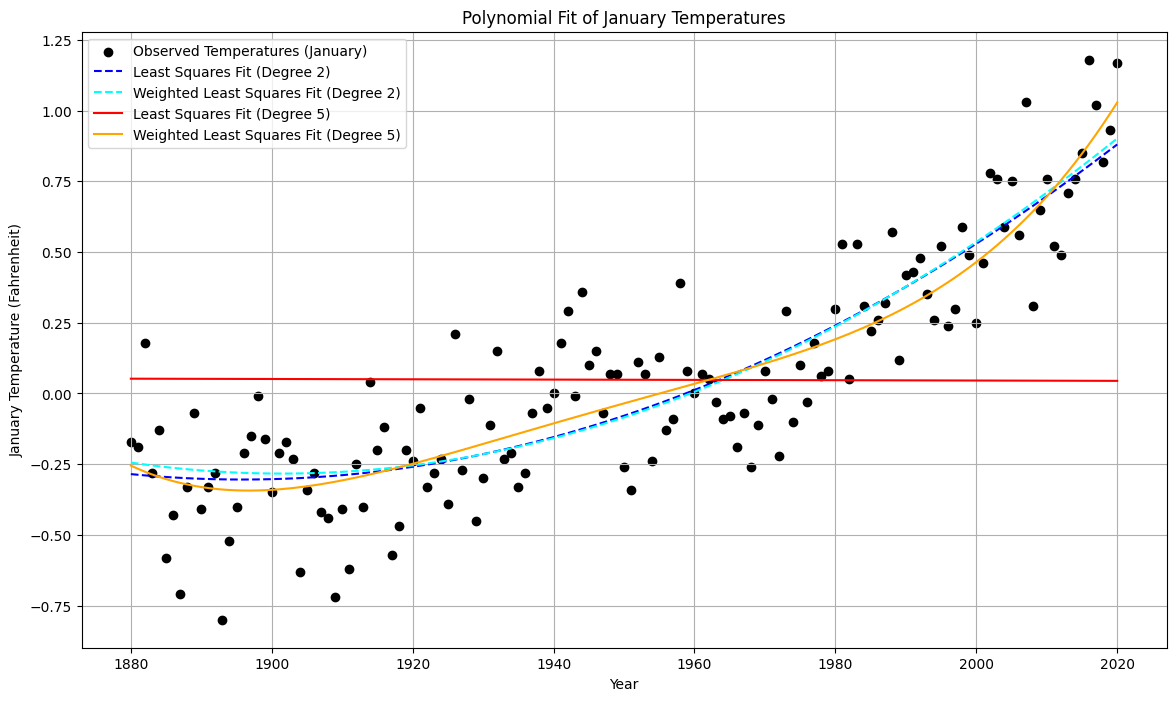

In [6]:
t = data['Year']
y = data['Jan']
var = data['var']

t = np.array(t)
y = np.array(y)
var = np.array(var)

weights = 1 / var

def create_design_matrix(t, degree):
    return np.vstack([t**i for i in range(degree + 1)]).T

def least_square_fit(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

def weighted_least_square_fit(X, y, weights):
    W = np.diag(weights)
    return np.linalg.inv(X.T @ W @ X) @ X.T @ W @ y

degree_2 = 2
X2 = create_design_matrix(t, degree_2)
theta_LS_2 = least_square_fit(X2, y)
theta_WLS_2 = weighted_least_square_fit(X2, y, weights)
y_pred_LS_2 = X2 @ theta_LS_2
y_pred_WLS_2 = X2 @ theta_WLS_2

degree_5 = 5
X5 = create_design_matrix(t, degree_5)
theta_LS_5 = least_square_fit(X5, y)
theta_WLS_5 = weighted_least_square_fit(X5, y, weights)
y_pred_LS_5 = X5 @ theta_LS_5
y_pred_WLS_5 = X5 @ theta_WLS_5

plt.figure(figsize=(14, 8))
plt.scatter(t, y, label='Observed Temperatures (January)', color='black', marker='o')
plt.plot(t, y_pred_LS_2, label='Least Squares Fit (Degree 2)', linestyle='--', color='blue')
plt.plot(t, y_pred_WLS_2, label='Weighted Least Squares Fit (Degree 2)', linestyle='--', color='cyan')
plt.plot(t, y_pred_LS_5, label='Least Squares Fit (Degree 5)', linestyle='-', color='red')
plt.plot(t, y_pred_WLS_5, label='Weighted Least Squares Fit (Degree 5)', linestyle='-', color='orange')
plt.xlabel('Year')
plt.ylabel('January Temperature (Fahrenheit)')
plt.title('Polynomial Fit of January Temperatures')
plt.legend()
plt.grid(True)
plt.show()

### For January the trend seems to hold still like it did for June, thought it seems to have a higher variance than what June does.